In [1057]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [1058]:
# 동작구 데이터 불러오기
Dongjak_2021_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/동작구212223/2021서울특별시_동작구_반려동물등록 현황.csv",encoding='euc-kr')
Dongjak_2022_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/동작구212223/2022서울특별시_동작구_반려동물등록 현황.csv",encoding='euc-kr')
Dongjak_2023_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/동작구212223/2023서울특별시_동작구_반려동물등록현황.csv",encoding='euc-kr')

# 동대문구 데이터 불러오기
Dondaemun_2021_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/동대문212223/2021서울특별시_동대문구_반려동물등록현황.csv",encoding='euc-kr')
Dondaemun_2022_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/동대문212223/2022서울특별시_동대문구_동별반려동물현황.csv",encoding='euc-kr')
Dondaemun_2023_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/동대문212223/2023서울특별시 동대문구_동별반려동물 현황.csv",encoding='euc-kr')

# 종로구 데이터 불러오기
Jongro_2021_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/종로구212223/2021반려동물등록현황_종로구.csv",encoding='euc-kr')
Jongro_2022_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/종로구212223/2022반려동물등록현황_종로구.csv",encoding='euc-kr')
Jongro_2023_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/종로구212223/2023서울특별시 종로구_반려동물등록현황.csv",encoding='euc-kr')

# 광진구 데이터 불러오기
Gwangjin_2021_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/광진구212224/2021서울특별시_광진구_반려동물 등록현황.csv",encoding='euc-kr')
Gwangjin_2022_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/광진구212224/2022서울특별시_광진구_반려동물 등록현황.csv",encoding='euc-kr')
Gwangjin_2024_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/광진구212224/2024서울특별시_광진구_반려동물 등록현황.csv",encoding='euc-kr')

# 금천구 데이터 불러오기
Geumcheon_2021_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/금천구212324/2021서울특별시_금천구_동별 반려동물 등록 현황 및 반려동물 등록 인구 수.csv",encoding='euc-kr')
Geumcheon_2023_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/금천구212324/2023서울특별시_금천구_반려동물 등록 현황 및 인구 수.csv",encoding='euc-kr')
Geumcheon_2024_raw = pd.read_csv("C:/Users/82108/Desktop/jw/data/주기성데이터/금천구212324/2024서울특별시 금천구_반려동물 등록 현황 및 등록 인구 수.csv",encoding='euc-kr')

동작구 데이터 열 통일하기

In [1059]:
# 원본 데이터 복사
Dongjak_2021 = Dongjak_2021_raw.copy()
Dongjak_2022 = Dongjak_2022_raw.copy()
Dongjak_2023 = Dongjak_2023_raw.copy()

In [1060]:
# 필요한 열만 추출하기
Dongjak_2021 = Dongjak_2021[['법정동','동물소유자수','반려동물총계']]
Dongjak_2022 = Dongjak_2022[['법정동','동물소유자수','반려동물총계']]
Dongjak_2023 = Dongjak_2023[['법정동','동물소유자수','반려동물총계']]

In [1061]:
Dongjak_2021.rename(columns = {'법정동':'Dong',
                                 '동물소유자수':'pet_owners',
                                 '반려동물총계':'total'}, inplace=True)
Dongjak_2022.rename(columns = {'법정동':'Dong',
                                 '동물소유자수':'pet_owners',
                                 '반려동물총계':'total'}, inplace=True)
Dongjak_2023.rename(columns = {'법정동':'Dong',
                                 '동물소유자수':'pet_owners',
                                 '반려동물총계':'total'}, inplace=True)

In [1062]:
# 데이터 확인하기
Dongjak_2021.head(3)

,Dong,pet_owners,total
0,본동,393,488
1,대방동,1405,1729
2,동작동,244,290


In [1063]:
Dongjak_2022.head(3)

,Dong,pet_owners,total
0,본동,428,539
1,대방동,1510,1869
2,동작동,256,305


In [1064]:
Dongjak_2023.head(3)

,Dong,pet_owners,total
0,본동,462,585
1,대방동,1579,1979
2,동작동,283,342


동대문구 데이터 열 통일하기

In [1065]:
# 원본 데이터 복사
Dondaemun_2021 = Dondaemun_2021_raw.copy()
Dondaemun_2022 = Dondaemun_2022_raw.copy()
Dondaemun_2023 = Dondaemun_2023_raw.copy()

In [1066]:
# 필요한 열만 추출하기
Dondaemun_2021 = Dondaemun_2021[['읍면동(법정동)','동물소유자수','총등록수']]
Dondaemun_2022 = Dondaemun_2022[['읍면동(법정동)','동물소유자수','총등록수']]
Dondaemun_2023 = Dondaemun_2023[['읍면동(법정동)','동물소유자수','총등록수']]

In [1067]:
Dondaemun_2021.rename(columns = {'읍면동(법정동)':'Dong',
                                 '동물소유자수':'pet_owners',
                                 '총등록수':'total'}, inplace=True)
Dondaemun_2022.rename(columns = {'읍면동(법정동)':'Dong',
                                 '동물소유자수':'pet_owners',
                                 '총등록수':'total'}, inplace=True)
Dondaemun_2023.rename(columns = {'읍면동(법정동)':'Dong',
                                 '동물소유자수':'pet_owners',
                                 '총등록수':'total'}, inplace=True)

In [1068]:
# 데이터 확인하기
Dondaemun_2021.head(3)

,Dong,pet_owners,total
0,신설동,155,209
1,용두동,1056,1397
2,이문동,1385,2428


In [1069]:
Dondaemun_2022.head(3)

,Dong,pet_owners,total
0,신설동,181,248
1,용두동,1232,1642
2,이문동,1544,2623


In [1070]:
Dondaemun_2023.head(3)

,Dong,pet_owners,total
0,신설동,183,254
1,용두동,1267,1692
2,이문동,1578,2671


종로구 데이터 열 통일하기

In [1071]:
# 원본 데이터 복사
Jongro_2021 = Jongro_2021_raw.copy()
Jongro_2022 = Jongro_2022_raw.copy()
Jongro_2023 = Jongro_2023_raw.copy()

In [1072]:
# 필요한 열만 추출하기
Jongro_2021 = Jongro_2021[['법정동명','등록소유자수','등록동물수(마리)']]
Jongro_2022 = Jongro_2022[['법정동명','등록소유자수','등록동물수(마리)']]
Jongro_2023 = Jongro_2023[['법정동명','등록소유자수','등록동물수(마리)']]

In [1073]:
Jongro_2021.rename(columns = {'법정동명':'Dong',
                                 '등록소유자수':'pet_owners',
                                 '등록동물수(마리)':'total'}, inplace=True)
Jongro_2022.rename(columns = {'법정동명':'Dong',
                                 '등록소유자수':'pet_owners',
                                 '등록동물수(마리)':'total'}, inplace=True)
Jongro_2023.rename(columns = {'법정동명':'Dong',
                                 '등록소유자수':'pet_owners',
                                 '등록동물수(마리)':'total'}, inplace=True)

In [1074]:
# 데이터 확인하기
Jongro_2021.head(3)

,Dong,pet_owners,total
0,계동,60,74
1,재동,4,4
2,평동,26,34


In [1075]:
Jongro_2022.head(3)

,Dong,pet_owners,total
0,계동,67,83
1,재동,6,7
2,평동,32,39


In [1076]:
Jongro_2023.head(3)

,Dong,pet_owners,total
0,계동,70,87
1,재동,6,7
2,평동,38,47


광진구 데이터 열 통일하기

In [1077]:
# 원본 데이터 복사
Gwangjin_2021 = Gwangjin_2021_raw.copy()
Gwangjin_2022= Gwangjin_2022_raw.copy()
Gwangjin_2024 = Gwangjin_2024_raw.copy()

In [1078]:
# 필요한 열 만들기(총 반력 동물 등록 수)
Gwangjin_2021['total'] = Gwangjin_2021['RFID종류(내장형)'] + Gwangjin_2021['RFID종류(외장형)'] + Gwangjin_2021['RFID종류(인식표)']
Gwangjin_2022['total'] = Gwangjin_2022['근거리 데이터 전송기술(RFID)종류_내장형'] + Gwangjin_2022['근거리 데이터 전송기술(RFID)종류_외장형'] + Gwangjin_2022['근거리 데이터 전송기술(RFID)종류_인식표']
Gwangjin_2024['total'] = Gwangjin_2021['RFID종류(내장형)'] + Gwangjin_2021['RFID종류(외장형)'] + Gwangjin_2021['RFID종류(인식표)']

In [1079]:
# 필요한 열만 추출하기
Gwangjin_2021 = Gwangjin_2021[['읍면동(법정동)','동물소유자수','total']]
Gwangjin_2022 = Gwangjin_2022[['읍면동(법정동)','동물소유자수','total']]
Gwangjin_2024 = Gwangjin_2024[['읍면동(법정동)','동물소유자수','total']]

In [1080]:
# 열 이름 변경
Gwangjin_2021.rename(columns = {'읍면동(법정동)':'Dong',
                                '동물소유자수':'pet_owners'},
                     inplace=True)

Gwangjin_2022.rename(columns = {'읍면동(법정동)':'Dong',
                                '동물소유자수':'pet_owners'},
                     inplace=True)

Gwangjin_2024.rename(columns = {'읍면동(법정동)':'Dong',
                                '동물소유자수':'pet_owners'},
                     inplace=True)

In [1081]:
# 데이터 확인하기
Gwangjin_2021.head(3)

,Dong,pet_owners,total
0,능동,400,493
1,광장동,1331,1588
2,구의동,3325,4223


In [1082]:
Gwangjin_2022.head(3)

,Dong,pet_owners,total
0,능동,67,79
1,광장동,234,259
2,구의동,480,567


In [1083]:
Gwangjin_2024.head(3)

,Dong,pet_owners,total
0,능동,463,493
1,광장동,1587,1588
2,구의동,3848,4223


금천구 데이터 열 통일하기

In [1084]:
# 원본 데이터 복사
Geumcheon_2021 = Geumcheon_2021_raw.copy()
Geumcheon_2023= Geumcheon_2023_raw.copy()
Geumcheon_2024 = Geumcheon_2024_raw.copy()

In [1085]:
Geumcheon_2021.head(1)

,법정동,동물소유자수(전체),개체수(전체),동물소유자수(개),개체수(개),동물소유자수(고양이),개체수(고양이),비고,데이터 기준일자
0,가산동,617,792,614,788,3,4,동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음,2021-03-05


In [1086]:
Geumcheon_2023.head(1)

,법정동,동물소유자수(전체),개체수(전체),동물소유자수(개),개체수(개),동물소유자수(고양이),개체수(고양이),비고,데이터 기준일자
0,가산동,861,1108,839,1084,22,24,동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음,2023-02-17


In [1087]:
Geumcheon_2024.head(1)

,법정동,동물소유자수(전체),개체수(전체),동물소유자수(개),개체수(개),동물소유자수(고양이),개체수(고양이),비고,데이터 기준일자
0,가산동,912,1139,882,1106,31,33,동물보호관리시스템 통계로서 축종별 통계를 합산한 전체 통계에 미세한 불일치 있음,2024-02-14


In [1088]:
# 필요한 열만 추출하기
Geumcheon_2021 = Geumcheon_2021[['법정동','동물소유자수(전체)','개체수(전체)']]
Geumcheon_2023 = Geumcheon_2023[['법정동','동물소유자수(전체)','개체수(전체)']]
Geumcheon_2024 = Geumcheon_2024[['법정동','동물소유자수(전체)','개체수(전체)']]

In [1089]:
# 열 이름 변경
Geumcheon_2021.rename(columns = {'법정동':'Dong',
                                '동물소유자수(전체)':'pet_owners',
                                '개체수(전체)':'total'},
                     inplace=True)

Geumcheon_2023.rename(columns = {'법정동':'Dong',
                                '동물소유자수(전체)':'pet_owners',
                                '개체수(전체)':'total'},
                     inplace=True)

Geumcheon_2024.rename(columns = {'법정동':'Dong',
                                '동물소유자수(전체)':'pet_owners',
                                '개체수(전체)':'total'},
                     inplace=True)

In [1090]:
# 데이터 확인하기
Geumcheon_2021.head(3)

,Dong,pet_owners,total
0,가산동,617,792
1,독산동,3639,4652
2,시흥동,4080,5209


In [1091]:
Geumcheon_2023.head(3)

,Dong,pet_owners,total
0,가산동,861,1108
1,독산동,4641,6046
2,시흥동,5030,6523


In [1092]:
Geumcheon_2024.head(3)

,Dong,pet_owners,total
0,가산동,912,1139
1,독산동,4709,6044
2,시흥동,5007,6369


회귀분석 모델 구축

In [1093]:
# 다른 구의 데이터를 활용하여 반려동물 등록 수와 소유자 수 사이의 관계 파악

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
# 선형 회귀분석을 하는 경우에는 위 클래스를 사용

import numpy as np
import pandas as pd
import statsmodels.api as sm

concat_data = pd.concat([Dongjak_2021,Dongjak_2022,Dongjak_2023
                        #,Dondaemun_2021,Dondaemun_2022,Dondaemun_2023
                        ,Jongro_2021,Jongro_2022,Jongro_2023
                        #,Gwangjin_2021,Gwangjin_2022,Gwangjin_2024
                        ,Geumcheon_2021,Geumcheon_2023,Geumcheon_2024
                        ])
# 유의성 검정과 교차검정에서 높은 평균 정확도를 보인 동작구, 종로구, 금천구 데이터만을 사용

# concat_data 컬럼 명 명시
concat_data.columns = ['Dong', 'pet_owners', 'total']



# 회귀 모델 적합
x = concat_data[['total']]  # 독립변수 : 총 등록 수
y = concat_data['pet_owners']   # 종속변수: 총 소유주 수

model = LinearRegression()
# model = LinearRegression(fit_intercept=True)
# fit_intercept인수는 상수항이 있는지 없는 지를 결정하는 인수 (default=true)
# 이 모델은 입력 데이터와 목표 변수 간의 선형 관계를 모델링
# 새로운 데이터에 대한 예측 수행
result = model.fit(x, y)
# 가중치 값을 추정
# 상수항 결합을 자동으로 해주므로 사용자가 직접 상수항 결합을 할 필요 없음
# >> 모델은 최적의 가중치(계수)와 편향성(상수항)을 추정 
# >> 가중치와 편향을 추정하는 과정에서 잔차 최소화
# 생성된 모델을 입력 데이터(x)와 목표변수(y)에 대해 학습시키는 과정

반려동물 소유자 수 예측 모델

In [1094]:
# 예측하고자 하는 데이터 파일 가져오기
Mapo_data_raw = pd.read_csv("C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울_반려동물_등록현황/서울특별시_마포구 동물등록 현황_20240216.csv",  encoding='euc-kr') 

# 원본데이터 복사
Mapo_data = Mapo_data_raw.copy()

# 데이터 확인
Mapo_data.head(3)

# 필요한 열만 추출하기
Mapo_data = Mapo_data[['법정동','합계']]

# 컬럼 명 변경하기
Mapo_data.rename(columns = {'법정동':'Dong',
                            '합계':'total'},
                 inplace=True)

# 반려동물 등록 수 입력
Mapo_total = Mapo_data['total']
Mapo_total = pd.DataFrame(Mapo_total)

# 소유자 수 예측
Mapo_pet_owners = result.predict(Mapo_total)
Mapo_pet_owners

array([  490.52489344,  1166.31208109,    46.72435229,    70.00060445,
         617.76840523,   970.01568789,   260.08999707,   121.2083592 ,
        2290.55506032,   412.93738624,  1377.35010066,  2147.79404709,
        2615.64671546,   590.61277772,    45.94847722,  1028.20631829,
        1009.58531656,   682.1660362 ,   296.55612545,   608.45790437,
          56.81072823,    80.86285546,  1112.00082606,   193.36474089,
         383.45413351,   520.00814617, 19229.45963076])

유의성 검정
- 모델이 데이터를 잘 설명하는지 여부
- 검정통계량을 사용하여 모델의 설명력을 통계적으로 판단
- statsmodels의 OLS 명령으로 선형회귀

In [1104]:
# 독립변수만 있는 데이터 프레임
x = concat_data[['total']]  # 독립변수 : 총 등록 수

# 종속변수만 있는 데이터 프레임
y = concat_data['pet_owners']   # 종속변수: 총 소유주 수

# 수동으로 상수항 추가
x = sm.add_constant(x)
# y = a*x + b
# 이때 b는 상수항
# sm.add_constant(x)을 사용하면 상수항이 있는 회귀 모델을 적합할 수 있음


model = sm.OLS(y, x).fit()
# 유의성 검정을 위해 최소 자승법을 사용하는 함수인 sm.OLS() 사용
# ols 회귀 모델은 주어진 데이터에 가장 적합한 선형회귀식을 추정
# 이때 sm.OLS()는 ols(최소자승법)을 사용하여 선형회귀에 적합
# 이는 독립변수 x와 종속변수 y 간의 선형관계를 나타내는 모델 구축

# F-검정
f_statistic = model.fvalue  # 검정통계량
# 검정통계량이 클수록 회귀모델이 유의
p_value = model.f_pvalue

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

'''
유의수준을 0.05라 할 때(95% 신뢰수준)
- 귀무가설: 회귀모형이 유의하지 않다.
- 대립가설: 회귀모형이 유의하다.

회귀모형의 유의성 검정은 검정통계량 F값이 48933이고,
유의확률 p값이 0으로 유의수준0.05보다 작으므로
귀무가설을 기각하고, 대립가설을 채택한다.
즉, 회귀 모델은 통계적으로 유의함.

'''

F-statistic: 669448.0527768019
p-value: 0.0


'\n유의수준을 0.05라 할 때(95% 신뢰수준)\n- 귀무가설: 회귀모형이 유의하지 않다.\n- 대립가설: 회귀모형이 유의하다.\n\n회귀모형의 유의성 검정은 검정통계량 F값이 48933이고,\n유의확률 p값이 0으로 유의수준0.05보다 작으므로\n귀무가설을 기각하고, 대립가설을 채택한다.\n즉, 회귀 모델은 통계적으로 유의함.\n\n'

교차 검정
- 주어진 데이터를 여러 번 반복해서 나누어 평가
- 종속변수의 값을 알아내고, 그 종속 변수 값을 얼마나 잘 예측하는 가를 

k-폴드 교차 검정
- 데이터의 수가 적은 경우에 학습과 검증을 반복하는 k폴드 교차 검정

In [1119]:
# 데이터 준비
X = concat_data[['total']]  # 독립 변수
y = concat_data['pet_owners']  # 종속 변수

# 모델 정의
model = LinearRegression()

# 교차 검증 수행
kfold = KFold(n_splits=5, shuffle=True, random_state=42)    # KFold 클래스 교차 검증
# 데이터를 5개의 Fold로 나누고 5-fold 교차 검증 수행,
# shuffle=True 무작위로 섞어서 분할
scores = cross_val_score(model, x, y, cv=kfold, scoring='r2')  # , R-squared로 평가
# cross_val_score함수를 사용하여 모델을 평가
# scoring='r2' : 평가 지표로 R-squared를 사용, 각 fold에서 모델의 R-squared계산
# rsquared(수정된 결정계수) = 1 - rss(잔차제곱합) / tss(총제곱합)


# fold의 성능 출력
for i in range(len(scores)):
    print(f'{i+1}번 fold의 R-squared: {scores[i]:.4f}')


print("평균 R-squared:", round(np.mean(scores),4))
#>> 매우 높은 설명력을 가짐

'''
# 동작, 동대문,  종로
각 fold의 R-squared: [0.98752059 0.99855989 0.99737419 0.9946932  0.995287  ]
평균 R-squared: 0.9946869742565878
# 각 fold의 R-squared 값은 fold에서 회귀모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표
# 0에서 1 사이의 값을 가짐. 1에 가까울수록 모델이 데이터를 잘 설몀

## 동대문,동작,종로,광진구,금천구
각 fold의 R-squared: [0.98329415 0.99175426 0.98825034 0.99955781 0.99616499]
평균 R-squared: 0.9918043104102539
'''

# 각 fold의 R-squared 값은 해당 fold에서 모델의 설명력을 나타냄
# R-squared 는 회귀 모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표
# 평균 R-squared은 해당 모델이 전체 데이터에서 얼마나 잘 설명하는 지 평균적인 정확도

# 결정계수는 독립변수의 수가 증가함에 따라 증가하므로,
# 독립변수를 추가할 때마다 결정계수가 증가한다는 단점을 가짐
# 수정된 결정계수는 이를 보완한 것으로 불필요한 독립변수가 추가되는 경우, 
# 수정된 결정계수는 증가하지 않고 감소할 수 있다.

1번 fold의 R-squared: 0.9997
2번 fold의 R-squared: 0.9995
3번 fold의 R-squared: 0.9997
4번 fold의 R-squared: 0.9986
5번 fold의 R-squared: 0.9995
평균 R-squared: 0.9994


'\n# 동작, 동대문,  종로\n각 fold의 R-squared: [0.98752059 0.99855989 0.99737419 0.9946932  0.995287  ]\n평균 R-squared: 0.9946869742565878\n# 각 fold의 R-squared 값은 fold에서 회귀모델이 종속변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표\n# 0에서 1 사이의 값을 가짐. 1에 가까울수록 모델이 데이터를 잘 설몀\n\n## 동대문,동작,종로,광진구,금천구\n각 fold의 R-squared: [0.98329415 0.99175426 0.98825034 0.99955781 0.99616499]\n평균 R-squared: 0.9918043104102539\n'

모델을 사용하여 서초구의 소유자 수를 측정한 후,
실제 소유자 수와 비교

In [1098]:
Seocho_2023_raw = pd.read_csv("C:/Users/82108/Desktop/jw/프로젝트/반려동물등록현황전처리전/서울_반려동물_등록현황/서울특별시_서초구_동물등록 현황_20230630.csv",encoding='euc-kr')
seocho = Seocho_2023_raw.copy()
seocho.head(1)

,법정동,내장형무선인식(RFID),외장형무선인식(RFID),인식표,등록품종수,동물소유자수,데이터기준일
0,내곡동,198,199,42,48,308,2023-06-30


In [1099]:
# 반려동물총계 컬럼 만들기
seocho['total'] = seocho['내장형무선인식(RFID)'] + seocho['외장형무선인식(RFID)'] + seocho['인식표']
seocho_total = seocho['total']
seocho_total = pd.DataFrame(seocho_total)

# 반려동물 소유자 수 컬럼 추출
seocho_owners = seocho['동물소유자수']

In [1100]:
predicted_owners = result.predict(seocho_total)

# 실제 소유자 수와 추정된 소유자 수 비교

accuracy_list = []
for i in range(len(predicted_owners)):
        print(f"{Seocho_2023_raw['법정동'][i]}")
        print(f'실제 소유자 수 :{seocho_owners[i]}')
        print(f'추정된 소유자 수:{predicted_owners[i]}')
        print(f'예측의 정확도:{100*(1- abs(seocho_owners[i] - predicted_owners[i])/seocho_owners[i]):.2f}%')
        accuracy = 100*(1- abs(seocho_owners[i] - predicted_owners[i])/seocho_owners[i])
        accuracy_list.append(accuracy)
    
    
    
print('-'*30)
total_accuracy = sum(accuracy_list)/len(accuracy_list)

print(f"총 정확도: {total_accuracy:.1f}%")

    

내곡동
실제 소유자 수 :308
추정된 소유자 수:339.2292544101588
예측의 정확도:89.86%
반포동
실제 소유자 수 :4034
추정된 소유자 수:4035.4980970978904
예측의 정확도:99.96%
방배동
실제 소유자 수 :5111
추정된 소유자 수:4985.945060215537
예측의 정확도:97.55%
서초동
실제 소유자 수 :4760
추정된 소유자 수:4847.839297411503
예측의 정확도:98.15%
신원동
실제 소유자 수 :244
추정된 소유자 수:253.8829964975537
예측의 정확도:95.95%
양재동
실제 소유자 수 :1717
추정된 소유자 수:1754.425385615537
예측의 정확도:97.82%
염곡동
실제 소유자 수 :54
추정된 소유자 수:63.0177288020915
예측의 정확도:83.30%
우면동
실제 소유자 수 :1106
추정된 소유자 수:1131.39770285352
예측의 정확도:97.70%
원지동
실제 소유자 수 :12
추정된 소유자 수:11.034098982595701
예측의 정확도:91.95%
잠원동
실제 소유자 수 :2518
추정된 소유자 수:2455.040575570831
예측의 정확도:97.50%
------------------------------
총 정확도: 95.0%


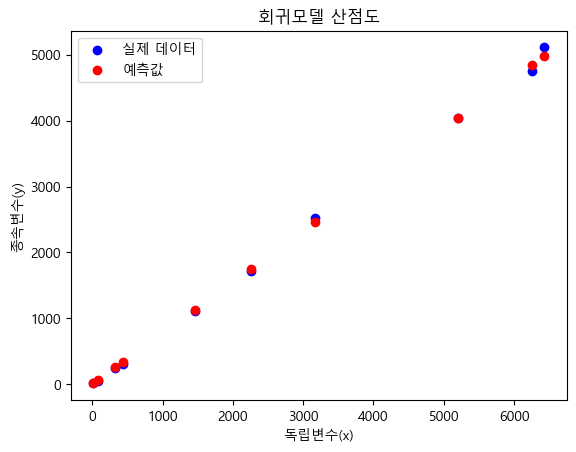

In [1101]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.scatter(seocho_total, seocho_owners, color='blue', label='실제 데이터')
plt.scatter(seocho_total, predicted_owners, color='red', label='예측값')
plt.xlabel('독립변수(x)')
plt.ylabel('종속변수(y)')
plt.title('회귀모델 산점도')
plt.legend()
plt.show()